In [105]:
# the default additions to my notebook
import pandas as pd
import numpy as np

# custom files used to import functions created by me and tailored for the telco dataset
import acquire
import prepare
import explore

# matplotlib and seaborn are added for visuals
import matplotlib.pyplot as plt
import seaborn as sns

# stats is added for any computational work that needs to be done
from scipy import stats

# utilized for creating models and visualization
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# utilized for metrics on my models
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
telco = acquire.get_telco_data()
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [5]:
telco.columns

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

- senior citizen: Whether someone is considered a senior citizen or not (Yes = 1 | No = 0)
- partner: Whether someone has a partner or not (Yes = 1 | No = 0)
- dependents: Whether someone has dependents on the account or not (Yes = 1 | No = 0)
- tenure:  How long a customer has been with Telco
- phone service: Whether a customer has phone service with telco or not (Yes = 1 | No = 0)
- multiple lines: Whether a customer has multiples lines, one line, or no phone service at all
- online_security: Whether a customer has online security, no onlines security, or no internet service at all
- online backup: Whether a customer has online backup, no online backup, or no internet service at all
- device protection: Whether a customer has device protection, no device protection, or no internet service at all
- tech support: Whether a customer has technical suppport or not (Yes = 1 | No = 0)
- streaming tv: Does the customer stream tv with their account (Yes = 1 | No = 0)
- streaming movies: Does the customer stream movies with their account (Yes = 1 | No = 0)
- paperless billing: Does the customer utilize electronic billing or not (Yes = 1 | No = 0)
- monthly charges:  The dollar amount a customer pays each month
- total charges:  The dollar amount the customer has paid altogether since opening an account
- churn: Whether the customer has ended services with Telco or not (Yes = 1 | No = 0)
- contract type: whether the customer is in a one year, two year, or month to month contract
- internet service type:  whether the customer uses DSL, fiber optic, or no internet
- payment type: whether a customer pays via electronic check, mailed check, bank transfer, or credit card

In [6]:
telco = prepare.prep_telco(telco)
telco.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,is_female,has_partner,has_dependents,has_phone_service,has_paperless_billing,...,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,0,9,65.6,593.30,1,1,1,1,1,...,1,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,0,9,59.9,542.40,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,0,4,73.9,280.85,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,1,13,98.0,1237.85,0,1,0,1,1,...,0,1,1,0,0,1,0,0,1,0
4,0013-EXCHZ,1,3,83.9,267.40,1,1,0,1,1,...,1,1,0,0,0,1,0,0,0,1


In [7]:
telco.has_churned.value_counts()

0    5174
1    1869
Name: has_churned, dtype: int64

In [8]:
telco.isna().mean()

customer_id                             0.0
senior_citizen                          0.0
tenure                                  0.0
monthly_charges                         0.0
total_charges                           0.0
is_female                               0.0
has_partner                             0.0
has_dependents                          0.0
has_phone_service                       0.0
has_paperless_billing                   0.0
has_churned                             0.0
multiple_lines_Yes                      0.0
online_security_Yes                     0.0
online_backup_Yes                       0.0
device_protection_Yes                   0.0
tech_support_Yes                        0.0
streaming_tv_Yes                        0.0
streaming_movies_Yes                    0.0
contract_type_One year                  0.0
contract_type_Two year                  0.0
internet_service_type_Fiber optic       0.0
internet_service_type_None              0.0
payment_type_Credit card (automa

In [9]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customer_id                           7043 non-null   object 
 1   senior_citizen                        7043 non-null   int64  
 2   tenure                                7043 non-null   int64  
 3   monthly_charges                       7043 non-null   float64
 4   total_charges                         7043 non-null   float64
 5   is_female                             7043 non-null   int64  
 6   has_partner                           7043 non-null   int64  
 7   has_dependents                        7043 non-null   int64  
 8   has_phone_service                     7043 non-null   int64  
 9   has_paperless_billing                 7043 non-null   int64  
 10  has_churned                           7043 non-null   int64  
 11  multiple_lines_Ye

In [10]:
for col in telco.columns:
    print(telco[col].value_counts())
    print()

0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64

0    5901
1    1142
Name: senior_citizen, dtype: int64

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
116.55     1
106.85     1
68.55      1
108.80     1
67.85      1
Name: monthly_charges, Length: 1585, dtype: int64

0.00       11
20.20      11
19.75       9
19.90       8
20.05       8
           ..
2387.75     1
6302.80     1
2058.50     1
829.55      1
3707.60     1
Name: total_charges, Length: 6531, dtype: int64

0    3555
1    3488
Name: is_female, dtype: int64

0    3641
1    3402
Name: has_partner, dtype: int64

0    4933
1    2110
Name: has_dependents, dtype: int64

1    6361
0   

In [11]:
train, validate, test = prepare.my_train_test_split(telco, 'has_churned')

In [12]:
train.shape, validate.shape, test.shape

((4225, 25), (1409, 25), (1409, 25))

In [13]:
num_type_list, cat_type_list = explore.dtypes_to_list(train)

In [14]:
num_type_list

['monthly_charges', 'total_charges']

In [15]:
cat_type_list

['customer_id',
 'senior_citizen',
 'tenure',
 'is_female',
 'has_partner',
 'has_dependents',
 'has_phone_service',
 'has_paperless_billing',
 'has_churned',
 'multiple_lines_Yes',
 'online_security_Yes',
 'online_backup_Yes',
 'device_protection_Yes',
 'tech_support_Yes',
 'streaming_tv_Yes',
 'streaming_movies_Yes',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check']

In [16]:
cat_type_list.remove('has_churned')

In [17]:
cat_type_list

['customer_id',
 'senior_citizen',
 'tenure',
 'is_female',
 'has_partner',
 'has_dependents',
 'has_phone_service',
 'has_paperless_billing',
 'multiple_lines_Yes',
 'online_security_Yes',
 'online_backup_Yes',
 'device_protection_Yes',
 'tech_support_Yes',
 'streaming_tv_Yes',
 'streaming_movies_Yes',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check']

customer_id
8319-QBEHW    1
3677-TNKIO    1
6837-HAEVO    1
7649-PHJVR    1
7416-CKTEP    1
             ..
7495-OOKFY    1
4644-PIZRT    1
4513-CXYIX    1
9828-QHFBK    1
5081-NWSUP    1
Name: customer_id, Length: 4225, dtype: int64
8319-QBEHW    0.023669
3677-TNKIO    0.023669
6837-HAEVO    0.023669
7649-PHJVR    0.023669
7416-CKTEP    0.023669
                ...   
7495-OOKFY    0.023669
4644-PIZRT    0.023669
4513-CXYIX    0.023669
9828-QHFBK    0.023669
5081-NWSUP    0.023669
Name: customer_id, Length: 4225, dtype: float64


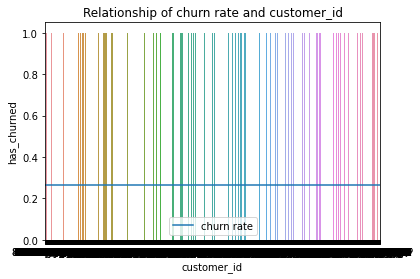

We fail to reject the null hypothesis that customer_id and churn rate are independent
There appears to be no relationship between churn rate and customer_id

senior_citizen
0    3541
1     684
Name: senior_citizen, dtype: int64
0    83.810651
1    16.189349
Name: senior_citizen, dtype: float64


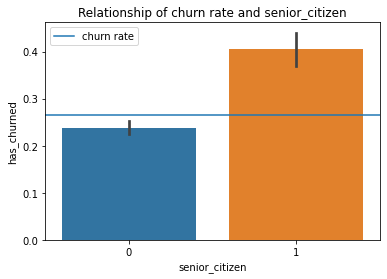

We reject the null hypothesis that senior_citizen and churn rate are independent
There is a relationship between churn rate and senior_citizen

tenure
1     358
72    217
2     143
3     112
71    106
     ... 
43     32
44     31
45     31
36     30
0       9
Name: tenure, Length: 73, dtype: int64
1     8.473373
72    5.136095
2     3.384615
3     2.650888
71    2.508876
        ...   
43    0.757396
44    0.733728
45    0.733728
36    0.710059
0     0.213018
Name: tenure, Length: 73, dtype: float64


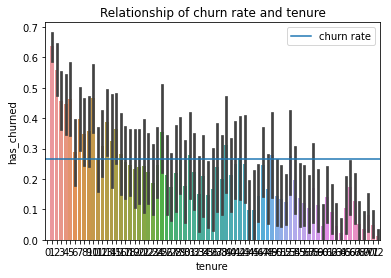

We reject the null hypothesis that tenure and churn rate are independent
There is a relationship between churn rate and tenure

is_female
0    2149
1    2076
Name: is_female, dtype: int64
0    50.863905
1    49.136095
Name: is_female, dtype: float64


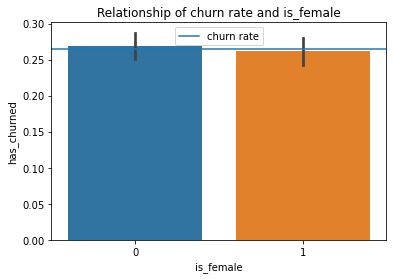

We fail to reject the null hypothesis that is_female and churn rate are independent
There appears to be no relationship between churn rate and is_female

has_partner
0    2161
1    2064
Name: has_partner, dtype: int64
0    51.147929
1    48.852071
Name: has_partner, dtype: float64


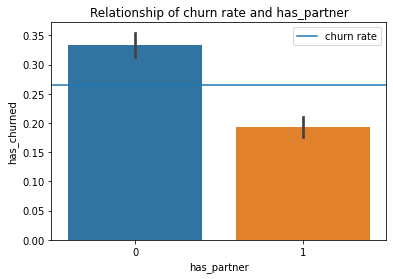

We reject the null hypothesis that has_partner and churn rate are independent
There is a relationship between churn rate and has_partner

has_dependents
0    2931
1    1294
Name: has_dependents, dtype: int64
0    69.372781
1    30.627219
Name: has_dependents, dtype: float64


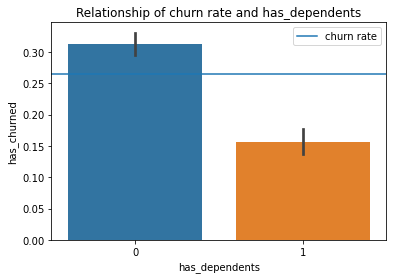

We reject the null hypothesis that has_dependents and churn rate are independent
There is a relationship between churn rate and has_dependents

has_phone_service
1    3832
0     393
Name: has_phone_service, dtype: int64
1    90.698225
0     9.301775
Name: has_phone_service, dtype: float64


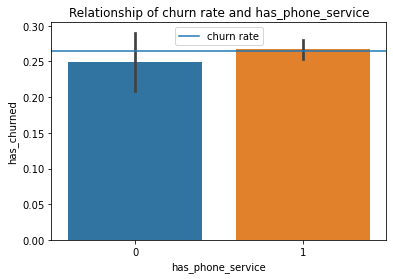

We fail to reject the null hypothesis that has_phone_service and churn rate are independent
There appears to be no relationship between churn rate and has_phone_service

has_paperless_billing
1    2509
0    1716
Name: has_paperless_billing, dtype: int64
1    59.384615
0    40.615385
Name: has_paperless_billing, dtype: float64


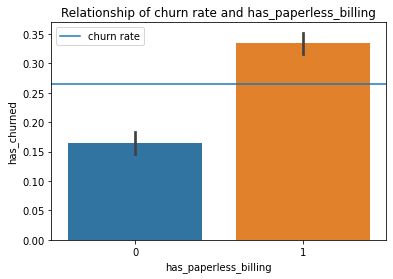

We reject the null hypothesis that has_paperless_billing and churn rate are independent
There is a relationship between churn rate and has_paperless_billing

multiple_lines_Yes
0    2418
1    1807
Name: multiple_lines_Yes, dtype: int64
0    57.230769
1    42.769231
Name: multiple_lines_Yes, dtype: float64


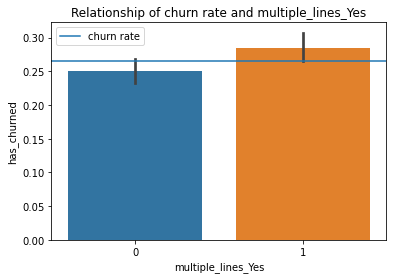

We reject the null hypothesis that multiple_lines_Yes and churn rate are independent
There is a relationship between churn rate and multiple_lines_Yes

online_security_Yes
0    2993
1    1232
Name: online_security_Yes, dtype: int64
0    70.840237
1    29.159763
Name: online_security_Yes, dtype: float64


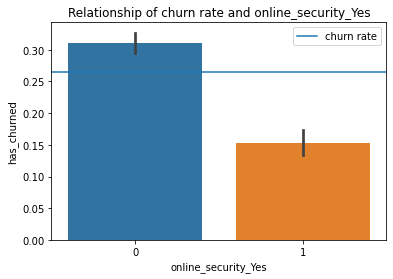

We reject the null hypothesis that online_security_Yes and churn rate are independent
There is a relationship between churn rate and online_security_Yes

online_backup_Yes
0    2746
1    1479
Name: online_backup_Yes, dtype: int64
0    64.994083
1    35.005917
Name: online_backup_Yes, dtype: float64


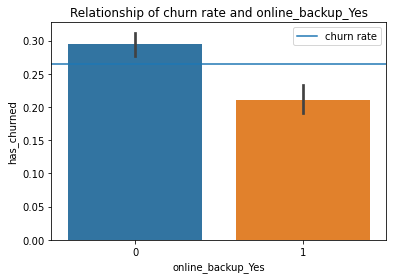

We reject the null hypothesis that online_backup_Yes and churn rate are independent
There is a relationship between churn rate and online_backup_Yes

device_protection_Yes
0    2742
1    1483
Name: device_protection_Yes, dtype: int64
0    64.899408
1    35.100592
Name: device_protection_Yes, dtype: float64


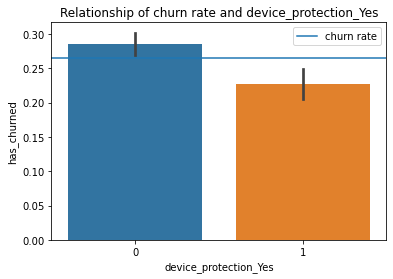

We reject the null hypothesis that device_protection_Yes and churn rate are independent
There is a relationship between churn rate and device_protection_Yes

tech_support_Yes
0    3002
1    1223
Name: tech_support_Yes, dtype: int64
0    71.053254
1    28.946746
Name: tech_support_Yes, dtype: float64


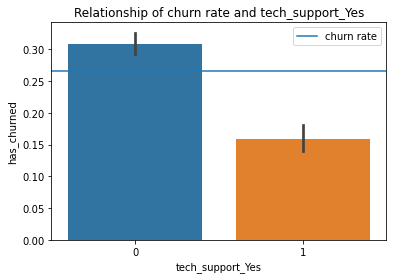

We reject the null hypothesis that tech_support_Yes and churn rate are independent
There is a relationship between churn rate and tech_support_Yes

streaming_tv_Yes
0    2568
1    1657
Name: streaming_tv_Yes, dtype: int64
0    60.781065
1    39.218935
Name: streaming_tv_Yes, dtype: float64


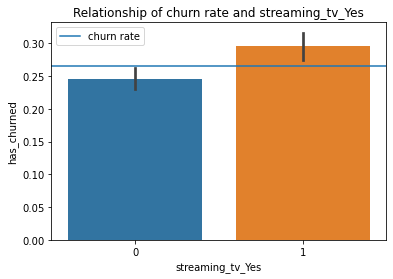

We reject the null hypothesis that streaming_tv_Yes and churn rate are independent
There is a relationship between churn rate and streaming_tv_Yes

streaming_movies_Yes
0    2554
1    1671
Name: streaming_movies_Yes, dtype: int64
0    60.449704
1    39.550296
Name: streaming_movies_Yes, dtype: float64


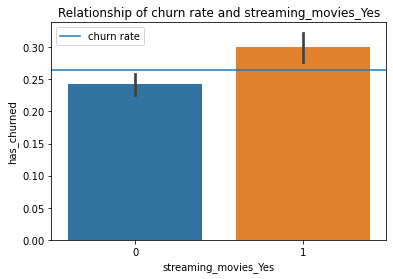

We reject the null hypothesis that streaming_movies_Yes and churn rate are independent
There is a relationship between churn rate and streaming_movies_Yes

contract_type_One year
0    3312
1     913
Name: contract_type_One year, dtype: int64
0    78.390533
1    21.609467
Name: contract_type_One year, dtype: float64


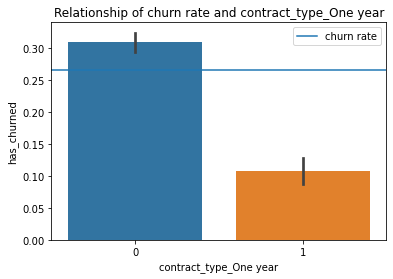

We reject the null hypothesis that contract_type_One year and churn rate are independent
There is a relationship between churn rate and contract_type_One year

contract_type_Two year
0    3230
1     995
Name: contract_type_Two year, dtype: int64
0    76.449704
1    23.550296
Name: contract_type_Two year, dtype: float64


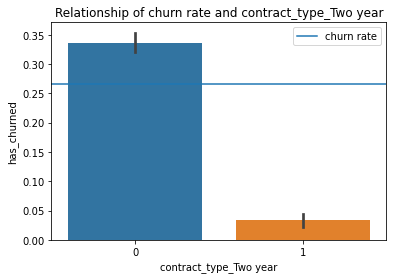

We reject the null hypothesis that contract_type_Two year and churn rate are independent
There is a relationship between churn rate and contract_type_Two year

internet_service_type_Fiber optic
0    2370
1    1855
Name: internet_service_type_Fiber optic, dtype: int64
0    56.094675
1    43.905325
Name: internet_service_type_Fiber optic, dtype: float64


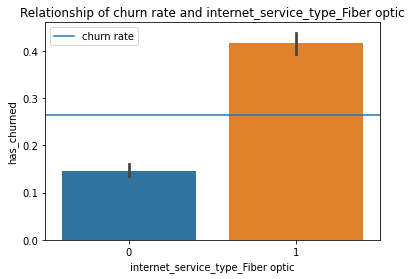

We reject the null hypothesis that internet_service_type_Fiber optic and churn rate are independent
There is a relationship between churn rate and internet_service_type_Fiber optic

internet_service_type_None
0    3302
1     923
Name: internet_service_type_None, dtype: int64
0    78.153846
1    21.846154
Name: internet_service_type_None, dtype: float64


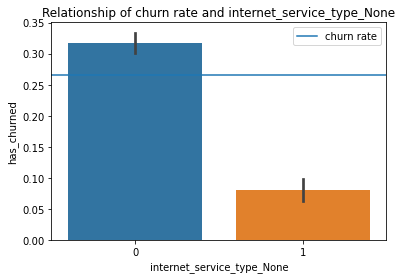

We reject the null hypothesis that internet_service_type_None and churn rate are independent
There is a relationship between churn rate and internet_service_type_None

payment_type_Credit card (automatic)
0    3306
1     919
Name: payment_type_Credit card (automatic), dtype: int64
0    78.248521
1    21.751479
Name: payment_type_Credit card (automatic), dtype: float64


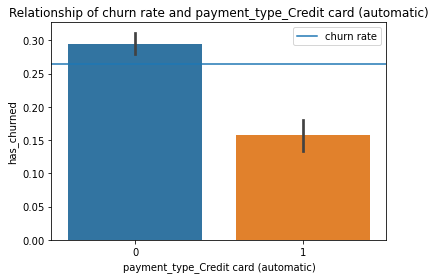

We reject the null hypothesis that payment_type_Credit card (automatic) and churn rate are independent
There is a relationship between churn rate and payment_type_Credit card (automatic)

payment_type_Electronic check
0    2802
1    1423
Name: payment_type_Electronic check, dtype: int64
0    66.319527
1    33.680473
Name: payment_type_Electronic check, dtype: float64


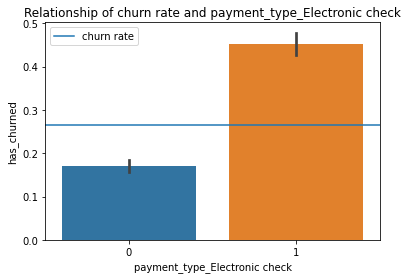

We reject the null hypothesis that payment_type_Electronic check and churn rate are independent
There is a relationship between churn rate and payment_type_Electronic check

payment_type_Mailed check
0    3275
1     950
Name: payment_type_Mailed check, dtype: int64
0    77.514793
1    22.485207
Name: payment_type_Mailed check, dtype: float64


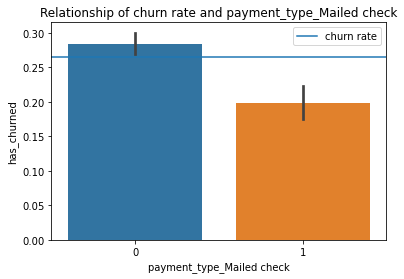

We reject the null hypothesis that payment_type_Mailed check and churn rate are independent
There is a relationship between churn rate and payment_type_Mailed check



In [18]:
for col in cat_type_list:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    explore.telco_analysis(train, col)
    print()

In [ ]:
# Gender and phone service seem to have little effect on whether a customer will churn or not and of course 
# customer id has zero dependency on churn rate but I will keep it in for the sake of the project. 


# Do older customers without tech support churn more often than those with?

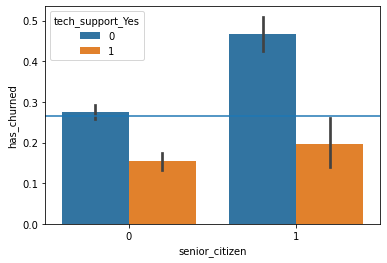

In [19]:
sns.barplot(x='senior_citizen', y='has_churned', hue= 'tech_support_Yes', data=train)
churn_rate = train.has_churned.mean()
plt.axhline(churn_rate, label='churn rate')

In [20]:
# Seems that senior citizens without tech support are more prone to churn than those who do have tech support

# Does streaming movies vs streaming tv have any affect on the churn rate

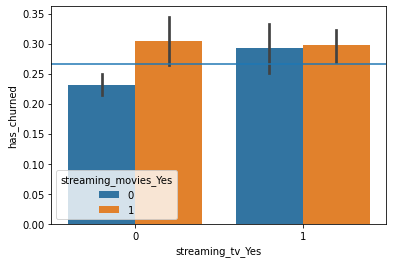

In [20]:
sns.barplot(x='streaming_tv_Yes', y='has_churned', hue= 'streaming_movies_Yes', data=train)
churn_rate = train.has_churned.mean()
plt.axhline(churn_rate, label='churn rate')

In [19]:
# Seems that having both or one streaming services will cause more churn than having none.

# Does having dependents/a partner increase churn rate vs not having them?

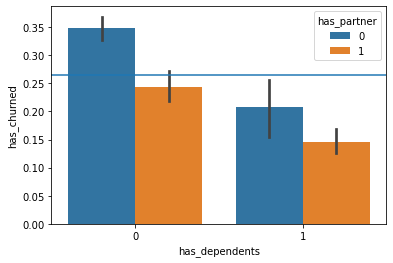

In [21]:
sns.barplot(x='has_dependents', y='has_churned', hue= 'has_partner', data=train)
churn_rate = train.has_churned.mean()
plt.axhline(churn_rate, label='churn rate')

In [25]:
# Customers with no partner and no dependents are more prone to churn than those who do have them

# How does monthly charges and tenure relate in terms of churn rate?

<AxesSubplot:xlabel='monthly_charges', ylabel='tenure'>

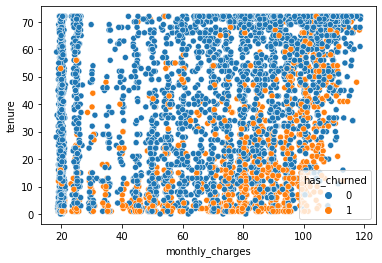

In [22]:
sns.scatterplot(x = 'monthly_charges', y='tenure', hue= 'has_churned', data = train)

In [32]:
# The higher the monthly charge the more likely the customer will churn thus leading to a low tenure value.

# How many customers who have fiber optic internet have churned compared to those without fiber optic internet?

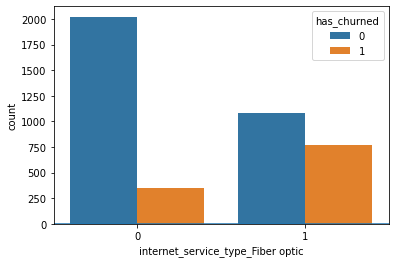

In [76]:
sns.countplot(x='internet_service_type_Fiber optic', hue='has_churned', data=train)

In [77]:
# More customers are prone to stay a customer if they do not use fiber optic internet vs those who do

# How does monthly charges and internet service type correlate?

<AxesSubplot:xlabel='internet_service_type_None', ylabel='monthly_charges'>

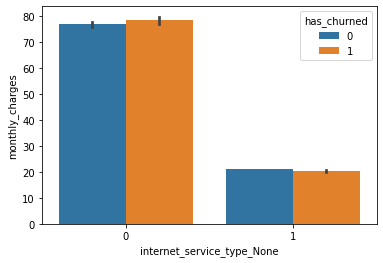

In [87]:
sns.barplot(x='internet_service_type_None', y='monthly_charges', hue='has_churned', data = train)

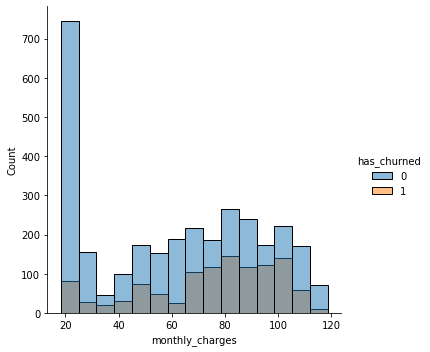

In [88]:
sns.displot(x='monthly_charges', hue="has_churned", data = train)

In [104]:
# The lower the monthly charges the higher chance of a customer not churning.  It seems that internet service
# type plays a role in increased monthly charges.

# How does contract type effect churn rate and which contract type tends to churn more often?

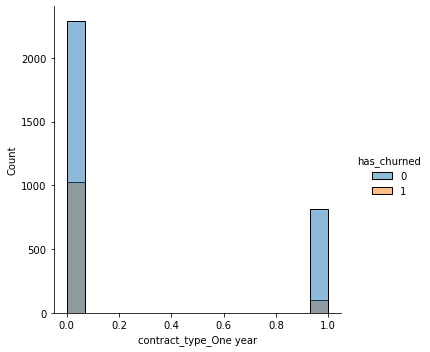

In [97]:
sns.displot(x='contract_type_One year', hue = 'has_churned', data= train)

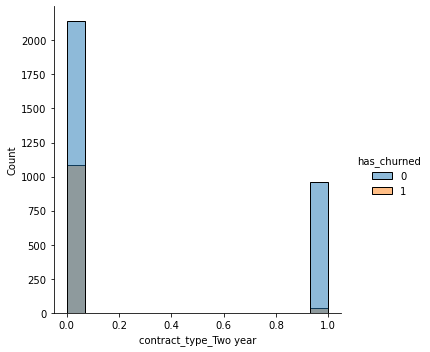

In [98]:
sns.displot(x='contract_type_Two year', hue = 'has_churned', data= train)

<AxesSubplot:xlabel='contract_type_One year', ylabel='count'>

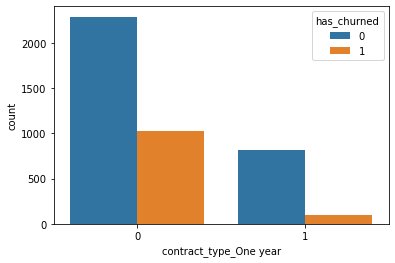

In [102]:
sns.countplot(x='contract_type_One year', hue = 'has_churned', data=train)

<AxesSubplot:xlabel='contract_type_Two year', ylabel='count'>

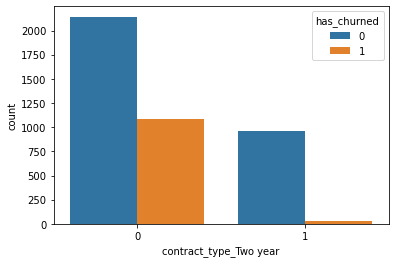

In [103]:
sns.countplot(x='contract_type_Two year', hue = 'has_churned', data=train)

In [ ]:
# Those with a month to month contract seem to churn much more often then those with two or one year contracts probably due to them being locked in

In [27]:
X_train = train.drop(columns = ['has_churned', 'customer_id'])
y_train = train.has_churned

In [28]:
print(f'The baseline accuracy for nonchurned customers in all cases within the telco dataset is {(y_train == 0).mean():.2}')

The baseline accuracy for nonchurned customers in all cases within the telco dataset is 0.73


In [29]:
clf = DecisionTreeClassifier()

In [30]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred = clf.predict(X_train)

In [32]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.997749,0.999103,0.998107,0.998426,0.998108
recall,0.999678,0.993756,0.998107,0.996717,0.998107
f1-score,0.998713,0.996422,0.998107,0.997567,0.998105
support,3104.000000,1121.000000,0.998107,4225.000000,4225.000000


In [33]:
clf2 = DecisionTreeClassifier(max_depth=10)

In [34]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [35]:
y_pred2 = clf2.predict(X_train)

In [36]:
pd.DataFrame(classification_report(y_train, y_pred2, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.903266,0.824311,0.88497,0.863788,0.882317
recall,0.944588,0.719893,0.88497,0.832240,0.884970
f1-score,0.923465,0.768571,0.88497,0.846018,0.882367
support,3104.000000,1121.000000,0.88497,4225.000000,4225.000000


In [40]:
X_train2 = train.drop(columns=(['has_churned', 'is_female', 'has_phone_service','customer_id']))
y_train2 = train.has_churned
X_validate = validate.drop(columns=(['has_churned', 'is_female', 'has_phone_service','customer_id']))
y_validate = validate.has_churned
X_test = test.drop(columns=(['has_churned', 'is_female', 'has_phone_service','customer_id']))
y_test = test.has_churned

In [41]:
clf3 = DecisionTreeClassifier()

In [42]:
clf3.fit(X_train2, y_train2)

DecisionTreeClassifier()

In [43]:
y_pred3 = clf3.predict(X_train2)

In [44]:
pd.DataFrame(classification_report(y_train2, y_pred3, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.996788,0.999101,0.997396,0.997944,0.997401
recall,0.999678,0.991079,0.997396,0.995379,0.997396
f1-score,0.998231,0.995074,0.997396,0.996652,0.997393
support,3104.000000,1121.000000,0.997396,4225.000000,4225.000000


In [45]:
clf4 = DecisionTreeClassifier(max_depth=10)

In [46]:
clf4.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=10)

In [47]:
y_pred4 = clf4.predict(X_train2)

In [48]:
pd.DataFrame(classification_report(y_train2, y_pred4, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.900920,0.826943,0.884024,0.863932,0.881292
recall,0.946198,0.711864,0.884024,0.829031,0.884024
f1-score,0.923004,0.765101,0.884024,0.844053,0.881109
support,3104.000000,1121.000000,0.884024,4225.000000,4225.000000


In [49]:
pd.DataFrame(classification_report(y_validate, clf3.predict(X_validate), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.820096,0.510989,0.740241,0.665542,0.738048
recall,0.828019,0.497326,0.740241,0.662673,0.740241
f1-score,0.824038,0.504065,0.740241,0.664052,0.739106
support,1035.000000,374.000000,0.740241,1409.000000,1409.000000


In [50]:
pd.DataFrame(classification_report(y_validate, clf4.predict(X_validate), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.820677,0.563291,0.762952,0.691984,0.752357
recall,0.866667,0.475936,0.762952,0.671301,0.762952
f1-score,0.843045,0.515942,0.762952,0.679494,0.756220
support,1035.000000,374.000000,0.762952,1409.000000,1409.000000


In [51]:
train.columns

Index(['customer_id', 'senior_citizen', 'tenure', 'monthly_charges',
       'total_charges', 'is_female', 'has_partner', 'has_dependents',
       'has_phone_service', 'has_paperless_billing', 'has_churned',
       'multiple_lines_Yes', 'online_security_Yes', 'online_backup_Yes',
       'device_protection_Yes', 'tech_support_Yes', 'streaming_tv_Yes',
       'streaming_movies_Yes', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_Fiber optic',
       'internet_service_type_None', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check'],
      dtype='object')

In [59]:
X_train = train.drop(columns=(['has_churned', 'is_female', 'has_phone_service','customer_id', 'multiple_lines_Yes', 'online_backup_Yes', 'device_protection_Yes', 'streaming_tv_Yes', 'streaming_movies_Yes']))
y_train = train.has_churned
X_validate = validate.drop(columns=(['has_churned', 'is_female', 'has_phone_service','customer_id', 'multiple_lines_Yes', 'online_backup_Yes', 'device_protection_Yes', 'streaming_tv_Yes', 'streaming_movies_Yes']))
y_validate = validate.has_churned
X_test = test.drop(columns=(['has_churned', 'is_female', 'has_phone_service','customer_id','multiple_lines_Yes', 'online_backup_Yes', 'device_protection_Yes', 'streaming_tv_Yes', 'streaming_movies_Yes']))
y_test = test.has_churned

In [60]:
clf = DecisionTreeClassifier(max_depth=10)

In [61]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [62]:
y_pred = clf.predict(X_train)

In [63]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.905853,0.820281,0.88568,0.863067,0.883149
recall,0.942332,0.728814,0.88568,0.835573,0.885680
f1-score,0.923733,0.771847,0.88568,0.847790,0.883434
support,3104.000000,1121.000000,0.88568,4225.000000,4225.000000


In [64]:
y_pred2 = clf.predict(X_validate)

In [65]:
pd.DataFrame(classification_report(y_validate, y_pred2, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.832714,0.582583,0.773598,0.707648,0.766320
recall,0.865700,0.518717,0.773598,0.692209,0.773598
f1-score,0.848887,0.548798,0.773598,0.698842,0.769232
support,1035.000000,374.000000,0.773598,1409.000000,1409.000000


After taking out the following features that showed no dependency with churn rate:
- multiple lines
- gender
- phone service
And the less influential features that showed a relationship but at a smaller rate:
- online backup
- device protection
- streaming tv
- streaming movies

The accuracy of my models went up for my train and validate data sets.

# Time to use a different classification model with the same features

In [67]:
logit = LogisticRegression(random_state=123)

In [68]:
logit.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [69]:
y_pred = logit.predict(X_train)

In [70]:
print(confusion_matrix(y_train, y_pred))

[[2800  304]
 [ 574  547]]


In [71]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.829876,0.642773,0.792189,0.736324,0.780233
recall,0.902062,0.487957,0.792189,0.695010,0.792189
f1-score,0.864464,0.554767,0.792189,0.709616,0.782294
support,3104.000000,1121.000000,0.792189,4225.000000,4225.000000


In [72]:
pd.DataFrame(classification_report(y_validate, logit.predict(X_validate), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.836007,0.662021,0.800568,0.749014,0.789825
recall,0.906280,0.508021,0.800568,0.707151,0.800568
f1-score,0.869726,0.574887,0.800568,0.722307,0.791465
support,1035.000000,374.000000,0.800568,1409.000000,1409.000000


In [147]:
logit = LogisticRegression(C=.8)
logit = logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print(pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)))
print()
print(pd.DataFrame(classification_report(y_validate, logit.predict(X_validate), output_dict=True)))

                     0            1  accuracy    macro avg  weighted avg
precision     0.843352     0.649839   0.80071     0.746595      0.792008
recall        0.894974     0.539697   0.80071     0.717335      0.800710
f1-score      0.868396     0.589669   0.80071     0.729032      0.794443
support    3104.000000  1121.000000   0.80071  4225.000000   4225.000000

                     0           1  accuracy    macro avg  weighted avg
precision     0.846224    0.661290  0.805536     0.753757      0.797136
recall        0.898551    0.548128  0.805536     0.723340      0.805536
f1-score      0.871603    0.599415  0.805536     0.735509      0.799354
support    1035.000000  374.000000  0.805536  1409.000000   1409.000000


In [139]:
logit.score(X_train, y_train)

0.7983431952662722

In [148]:
logit.score(X_validate, y_validate)-logit.score(X_train, y_train)

0.004825781850403721

# Logistic Regression Model best fit = .006 diff

Utilizing a Logistic Regression Model allowed for a tighter metric between my train and validate set while still outperforming the baseline accuracy.

# Random Forest model

In [112]:
rf = RandomForestClassifier(max_depth=5)

In [113]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [114]:
y_pred = rf.predict(X_train)

In [115]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.828605,0.686122,0.802604,0.757363,0.790800
recall,0.922036,0.471900,0.802604,0.696968,0.802604
f1-score,0.872827,0.559197,0.802604,0.716012,0.789613
support,3104.000000,1121.000000,0.802604,4225.000000,4225.000000


In [116]:
pd.DataFrame(classification_report(y_validate, rf.predict(X_validate), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.833042,0.690566,0.806246,0.761804,0.795224
recall,0.920773,0.489305,0.806246,0.705039,0.806246
f1-score,0.874713,0.572770,0.806246,0.723742,0.794566
support,1035.000000,374.000000,0.806246,1409.000000,1409.000000


In [133]:
for i in range (5, 11):
    rf = RandomForestClassifier(max_depth= i, random_state=123)
    rf = rf.fit(X_train, y_train)
    y_pred = rf.predict(X_train)
    print(f'Tree with max depth of {i}')
    print(pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)))

Tree with max depth of 5
                     0            1  accuracy    macro avg  weighted avg
precision     0.826575     0.692513   0.80284     0.759544      0.791005
recall        0.925902     0.462087   0.80284     0.693995      0.802840
f1-score      0.873423     0.554307   0.80284     0.713865      0.788754
support    3104.000000  1121.000000   0.80284  4225.000000   4225.000000
Tree with max depth of 6
                     0            1  accuracy    macro avg  weighted avg
precision     0.837522     0.703611  0.812071     0.770567      0.801992
recall        0.923325     0.504014  0.812071     0.713670      0.812071
f1-score      0.878333     0.587318  0.812071     0.732825      0.801119
support    3104.000000  1121.000000  0.812071  4225.000000   4225.000000
Tree with max depth of 7
                     0            1  accuracy    macro avg  weighted avg
precision     0.849644     0.719812  0.823432     0.784728      0.815196
recall        0.923003     0.547725  0.823432    

In [134]:
for i in range (5, 11):
    rf = RandomForestClassifier(max_depth= i, random_state=123)
    rf = rf.fit(X_train, y_train)
    y_pred = rf.predict(X_validate)
    print(f'Tree with max depth of {i}')
    print(pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True)))

Tree with max depth of 5
                     0           1  accuracy    macro avg  weighted avg
precision     0.826840    0.685039  0.801278     0.755940      0.789201
recall        0.922705    0.465241  0.801278     0.693973      0.801278
f1-score      0.872146    0.554140  0.801278     0.713143      0.787736
support    1035.000000  374.000000  0.801278  1409.000000   1409.000000
Tree with max depth of 6
                     0           1  accuracy    macro avg  weighted avg
precision     0.834951    0.677536  0.804116     0.756244      0.793168
recall        0.914010    0.500000  0.804116     0.707005      0.804116
f1-score      0.872694    0.575385  0.804116     0.724039      0.793777
support    1035.000000  374.000000  0.804116  1409.000000   1409.000000
Tree with max depth of 7
                     0           1  accuracy    macro avg  weighted avg
precision     0.836283    0.677419  0.804826     0.756851      0.794115
recall        0.913043    0.505348  0.804826     0.709196    

In [135]:
# Random Forest model with a max depth of 5 is best fit

In [143]:
rf = RandomForestClassifier(max_depth=5,random_state=123)
rf = rf.fit(X_train, y_train)
rf.score(X_train, y_train) - rf.score(X_validate, y_validate)

0.0015627349120824752

# Random Forest Model best fit = .002 diff

# KNN Model

In [128]:
for i in range (10, 31, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    print(f'KNeighbors with n_neighbors of {i}')
    print(pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)))

KNeighbors with n_neighbors of 10
                     0            1  accuracy    macro avg  weighted avg
precision     0.819827     0.747634  0.808994     0.783731      0.800673
recall        0.948454     0.422837  0.808994     0.685645      0.808994
f1-score      0.879462     0.540171  0.808994     0.709817      0.789440
support    3104.000000  1121.000000  0.808994  4225.000000   4225.000000
KNeighbors with n_neighbors of 15
                     0            1  accuracy    macro avg  weighted avg
precision     0.821875     0.700709  0.801657     0.761292      0.789727
recall        0.932023     0.440678  0.801657     0.686351      0.801657
f1-score      0.873490     0.541073  0.801657     0.707282      0.785292
support    3104.000000  1121.000000  0.801657  4225.000000   4225.000000
KNeighbors with n_neighbors of 20
                     0            1  accuracy    macro avg  weighted avg
precision     0.809906     0.710311  0.795503     0.760108      0.783481
recall        0.942977

In [129]:
for i in range (10, 31, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_validate)
    print(f'KNeighbors with n_neighbors of {i}')
    print(pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True)))

KNeighbors with n_neighbors of 10
                     0           1  accuracy    macro avg  weighted avg
precision     0.803497    0.663462  0.782825     0.733479      0.766327
recall        0.932367    0.368984  0.782825     0.650676      0.782825
f1-score      0.863148    0.474227  0.782825     0.668688      0.759914
support    1035.000000  374.000000  0.782825  1409.000000   1409.000000
KNeighbors with n_neighbors of 15
                     0           1  accuracy    macro avg  weighted avg
precision     0.808673    0.639485  0.780696     0.724079      0.763765
recall        0.918841    0.398396  0.780696     0.658618      0.780696
f1-score      0.860244    0.490939  0.780696     0.675592      0.762217
support    1035.000000  374.000000  0.780696  1409.000000   1409.000000
KNeighbors with n_neighbors of 20
                     0           1  accuracy    macro avg  weighted avg
precision     0.802805    0.685279  0.786373     0.744042      0.771610
recall        0.940097    0.360963

In [130]:
# KNN Model (n_neighbor 25) is best match

In [144]:
knn = KNeighborsClassifier(n_neighbors=25)
knn = knn.fit(X_train, y_train)
knn.score(X_train, y_train) - knn.score(X_validate, y_validate)

0.005107655351690887